In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [5]:
df = pd.read_csv('/content/heart_disease_data.csv')
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


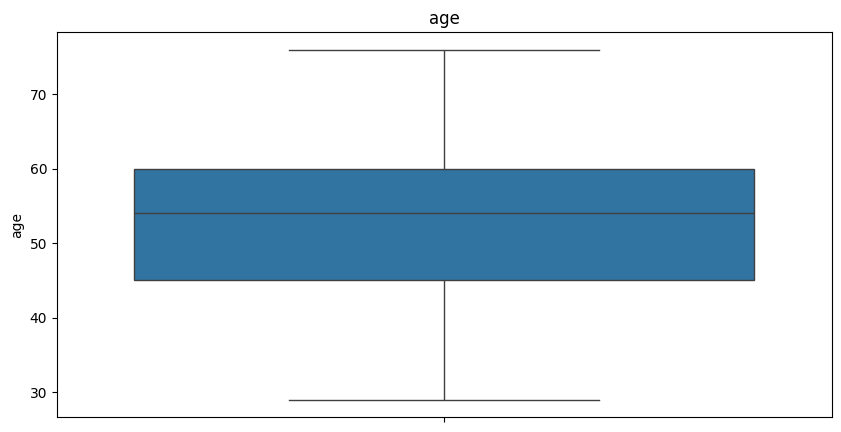

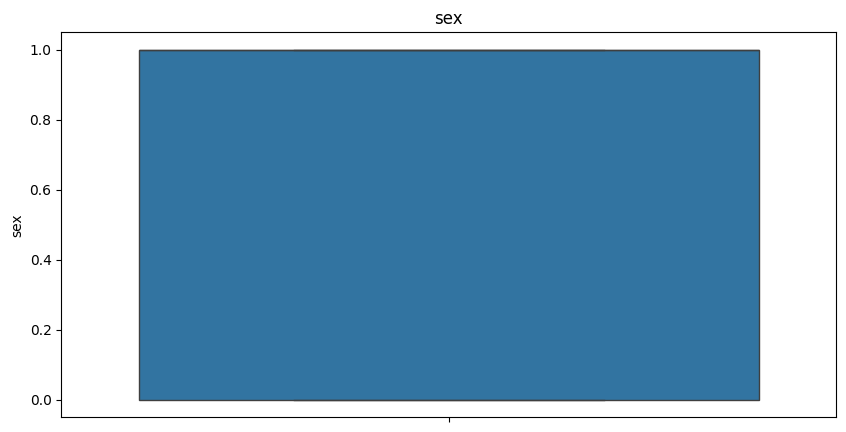

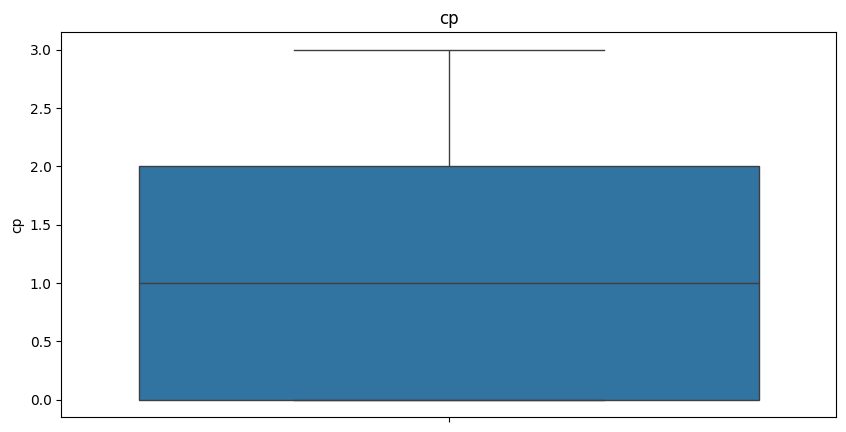

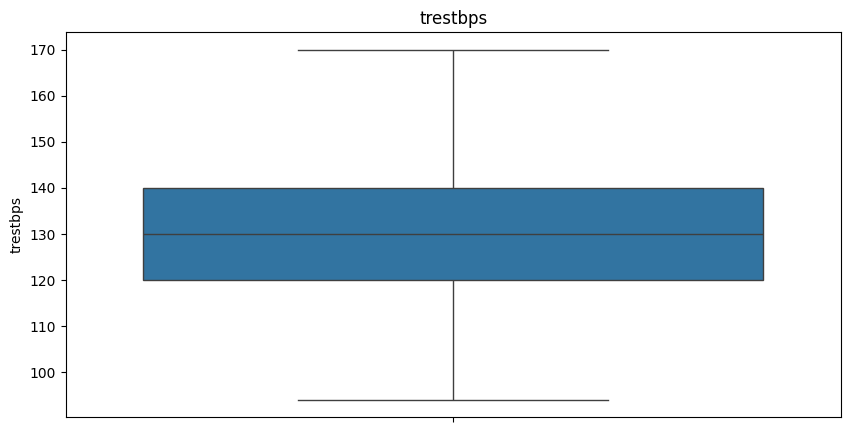

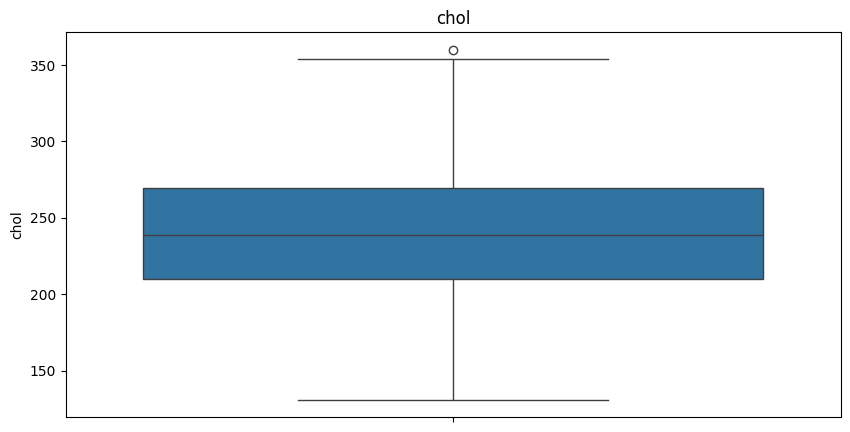

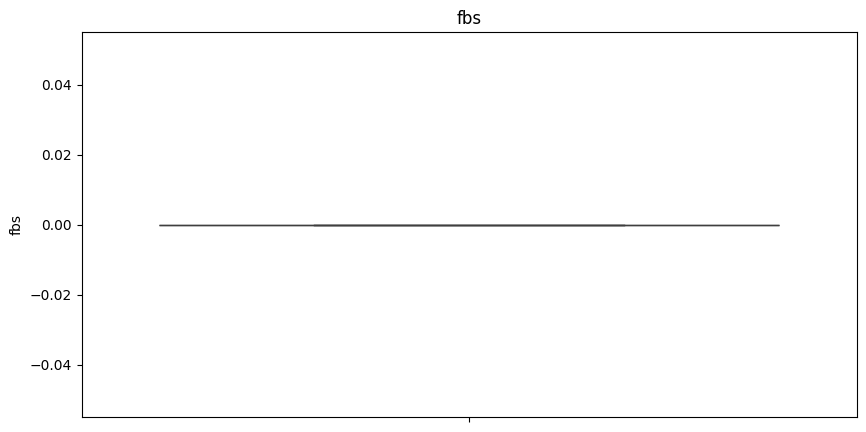

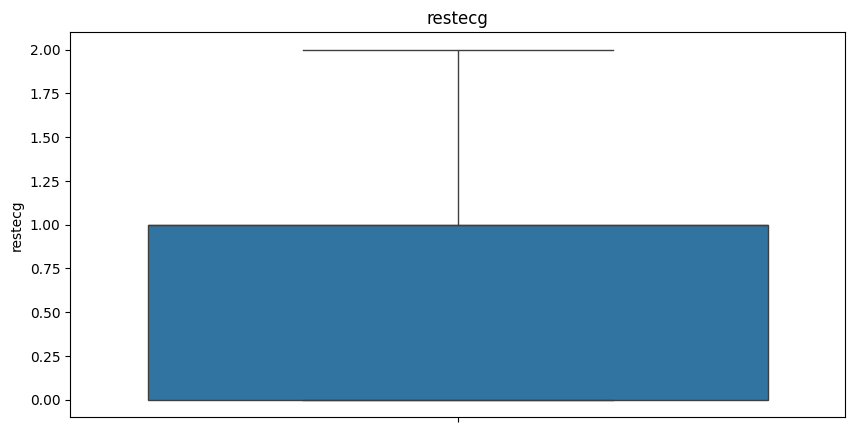

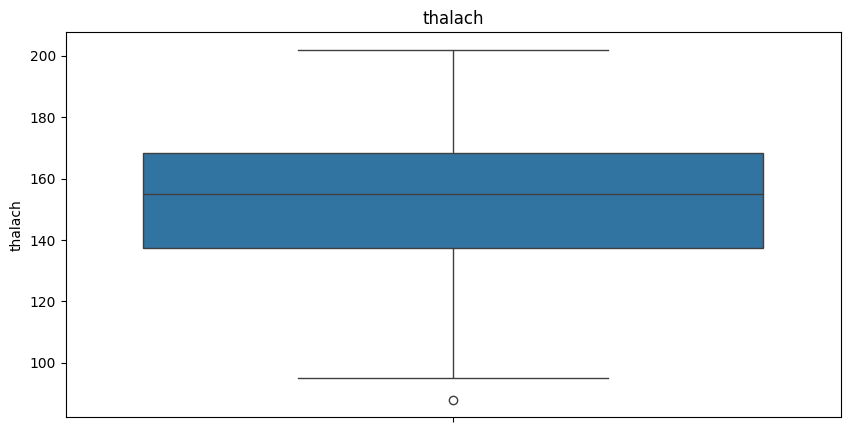

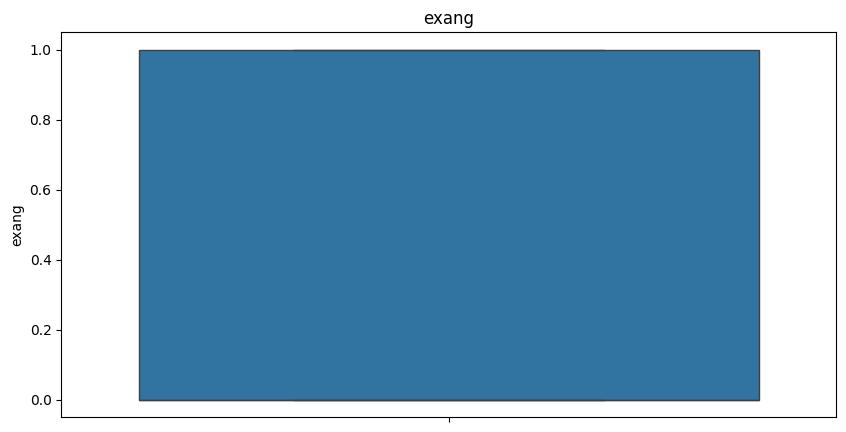

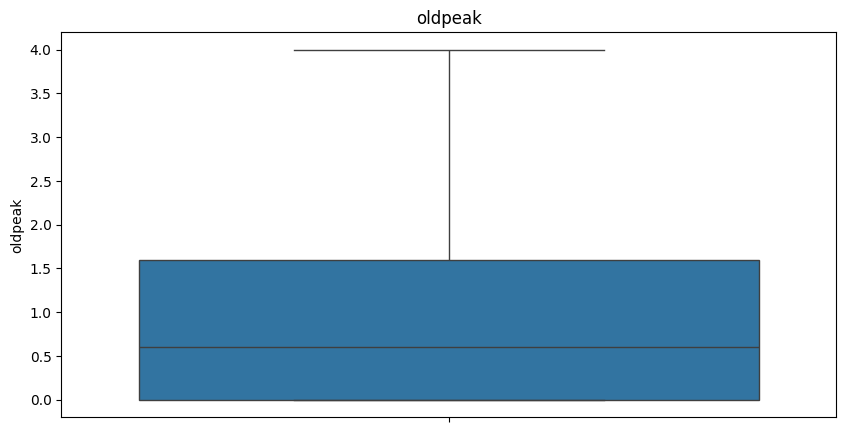

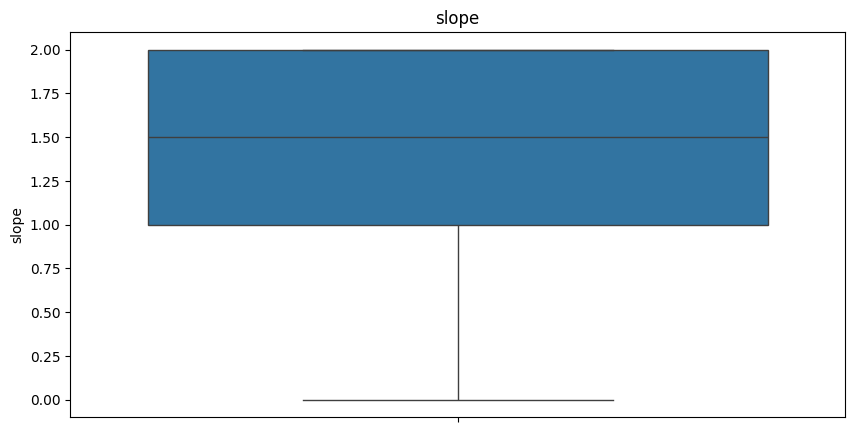

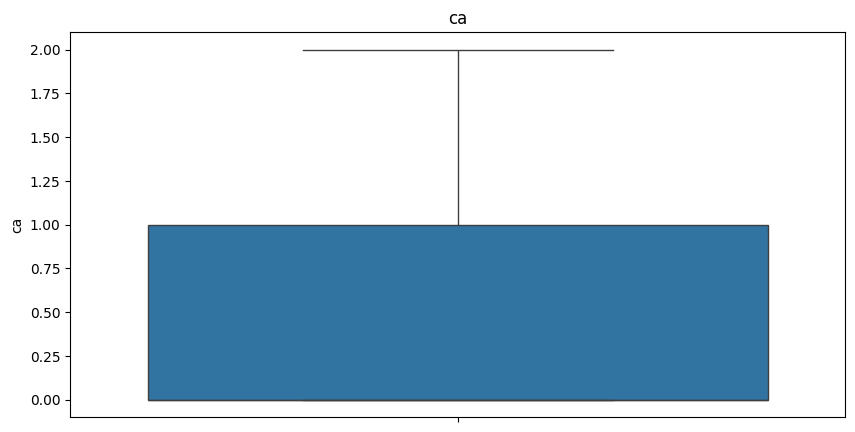

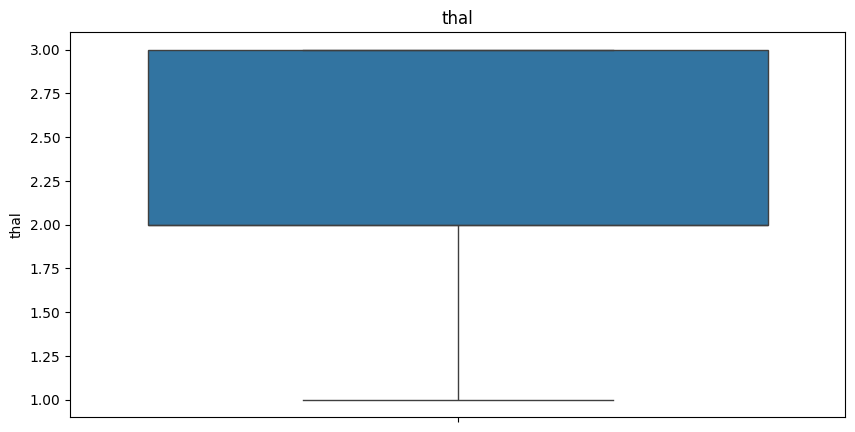

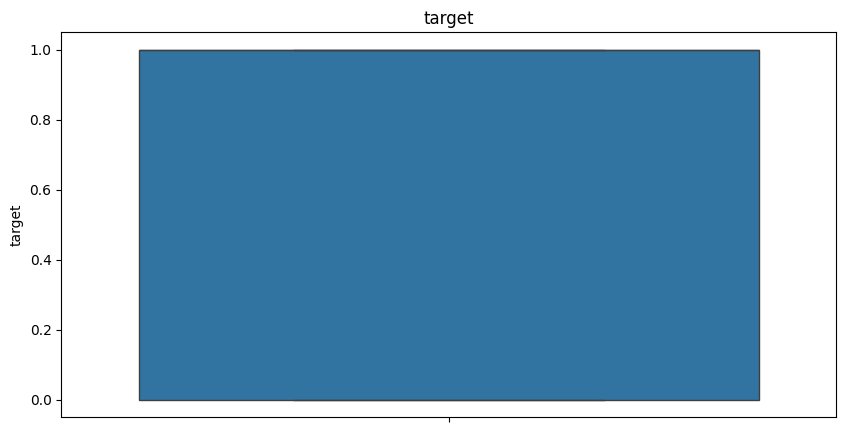

In [15]:
for col in df.columns:
  plt.figure(figsize=(10,5))
  sns.boxplot(df[col])
  plt.title(col)
  plt.show()

In [20]:
df.columns

df = df.drop('fbs', axis=1)
df

,age,sex,cp,trestbps,chol,restecg,thalach,exang,oldpeak,slope,ca,thal,target
1,37,1,2,130,250,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,1,163,1,0.6,2,0,2,1
5,57,1,0,140,192,1,148,0,0.4,1,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
296,63,0,0,124,197,1,136,1,0.0,1,0,2,0
298,57,0,0,140,241,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,1,132,0,1.2,1,0,3,0
301,57,1,0,130,131,1,115,1,1.2,1,1,3,0


In [21]:
imp_col = ['chol', 'thalach']

for col in imp_col:
  Q1 = df[col].quantile(0.25)
  Q3 = df[col].quantile(0.75)
  IQR = Q3 - Q1
  lower_limit = Q1 - 1.5 * IQR
  upper_limit = Q3 + 1.5 * IQR
  df = df[(df[col] >= lower_limit) & (df[col] <= upper_limit)]
df

,age,sex,cp,trestbps,chol,restecg,thalach,exang,oldpeak,slope,ca,thal,target
1,37,1,2,130,250,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,1,163,1,0.6,2,0,2,1
5,57,1,0,140,192,1,148,0,0.4,1,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
296,63,0,0,124,197,1,136,1,0.0,1,0,2,0
298,57,0,0,140,241,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,1,132,0,1.2,1,0,3,0
301,57,1,0,130,131,1,115,1,1.2,1,1,3,0


<Axes: >

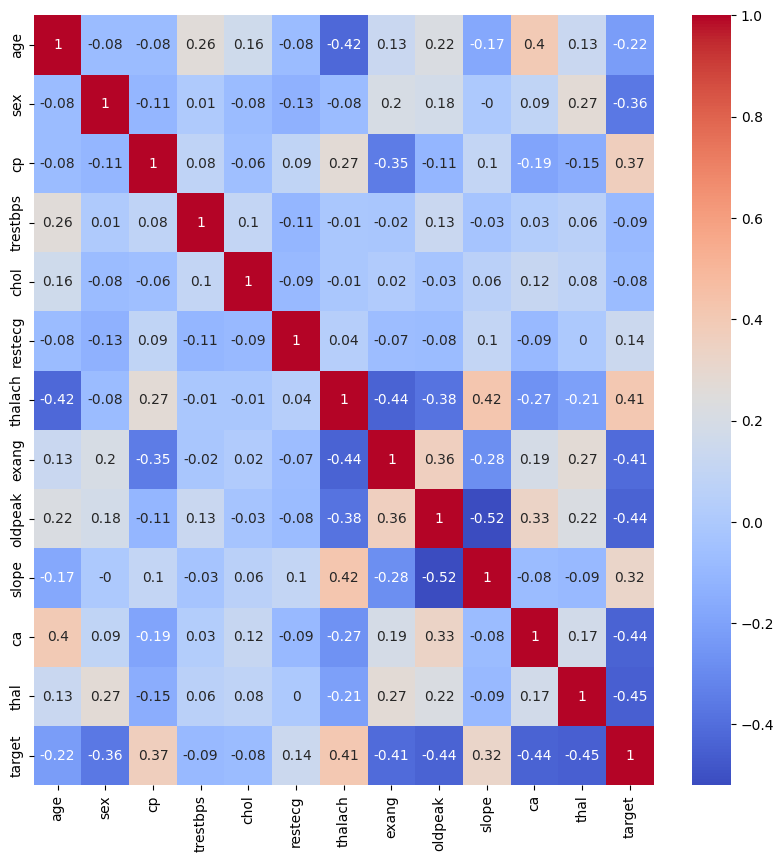

In [25]:
df.corr().round(2)
plt.figure(figsize=(10,10))
sns.heatmap(df.corr().round(2), annot=True, cmap='coolwarm')

In [30]:
# Defining the data
df.columns
x = df[['cp', 'thalach', 'slope', 'restecg']]
y = df['target']
print(x ,y)

     cp  thalach  slope  restecg
1     2      187      0        1
2     1      172      2        0
3     1      178      2        1
4     0      163      2        1
5     0      148      1        1
..   ..      ...    ...      ...
296   0      136      1        1
298   0      123      1        1
299   3      132      1        1
301   0      115      1        1
302   1      174      1        0

[226 rows x 4 columns] 1      1
2      1
3      1
4      1
5      1
      ..
296    0
298    0
299    0
301    0
302    0
Name: target, Length: 226, dtype: int64


In [38]:
# Splitting the data

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, stratify = y, random_state = 2, test_size = 0.2)
y_test

,target
160,1
9,1
209,0
49,1
226,0
264,0
34,1
273,0
212,0
2,1


In [39]:
# Define the model

from sklearn.linear_model import LogisticRegression
model = LogisticRegression()

In [40]:
# Train the model

model.fit(x_train, y_train)

LogisticRegression()

In [41]:
# Test the model

pred = model.predict(x_test)
pred

array([1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0,
       1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0,
       1, 0])

In [42]:
# Accuracy check

from sklearn.metrics import accuracy_score
accuracy_score(y_test, pred)

0.782608695652174

In [47]:
# Predictive analysis

input_data = (3, 153, 1, 1)
input_data_as_numpy_array = np.asarray(input_data)
input_data_reshaped = input_data_as_numpy_array.reshape(1, -1)
prediction = model.predict(input_data_reshaped)
print(prediction)

if (prediction[0] == 0):
  print('The person does not have a heart disease')
else:
  print('The person has a heart disease')

[1]
The person has a heart disease
